<a href="https://colab.research.google.com/github/2303A51048/AIML-2025B16/blob/main/LAB_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler


In [20]:
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [22]:
y_pred = model.predict(X_test_scaled)

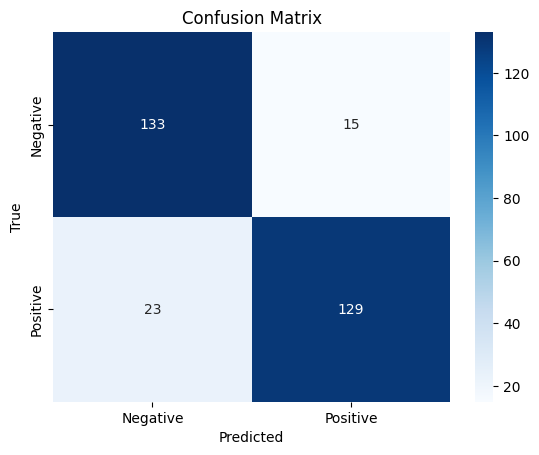

True Negative (TN): 133
False Positive (FP): 15
False Negative (FN): 23
True Positive (TP): 129


In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
TN, FP, FN, TP = cm.ravel()
print(f'True Negative (TN): {TN}')
print(f'False Positive (FP): {FP}')
print(f'False Negative (FN): {FN}')
print(f'True Positive (TP): {TP}')


In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.2f}')


Accuracy: 0.87
F1-Score: 0.87


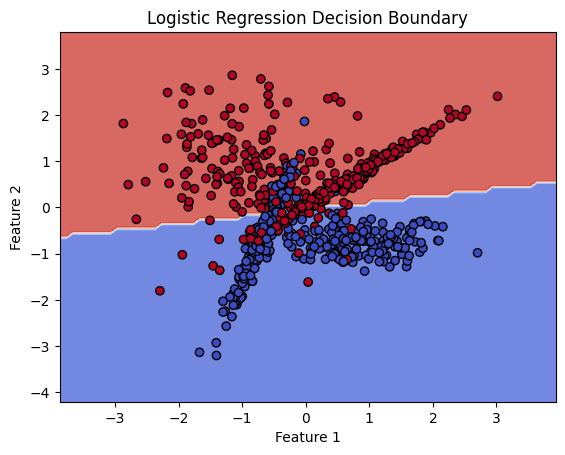

In [25]:
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolors='k', marker='o', cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()
